In [1]:
!pip install yfinance

zsh:1: command not found: pip


In [2]:
pip install yfinance

  Obtaining dependency information for yfinance from https://files.pythonhosted.org/packages/1b/0f/77716aa9dd84bb1aa5e93c87122af1de89697b6231f6d01d58d4e7c03c14/yfinance-0.2.36-py2.py3-none-any.whl.metadata
  Obtaining dependency information for multitasking>=0.0.7 from https://files.pythonhosted.org/packages/3e/8a/bb3160e76e844db9e69a413f055818969c8acade64e1a9ac5ce9dfdcf6c1/multitasking-0.0.11-py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 314.6/314.6 kB 5.0 MB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 17.8 MB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached html5lib-1.1-py2.py3-none-any.whl (112 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.4/72.4 kB 3.9 MB/s eta 0

In [3]:
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
from datetime import datetime, timedelta

# Function to fetch and predict stock data
def predict_stock_price(ticker):
    # Fetch historical data
    end_date = datetime.today().strftime('%Y-%m-%d')
    start_date = (datetime.today() - timedelta(days=5*365)).strftime('%Y-%m-%d')
    data = yf.download(ticker, start=start_date, end=end_date)
    
    # Prepare the data
    data['Days'] = (data.index - data.index.min()).days
    X = data['Days'].values.reshape(-1, 1)
    y = data['Close'].values
    
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    
    # Create and train the model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Prediction and evaluation
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f'Model for {ticker}: Mean Squared Error = {mse}')
    
    # Plotting the results
    predicted_prices = model.predict(X.reshape(-1, 1))
    actual_vs_predicted_df = pd.DataFrame({'Actual': y, 'Predicted': predicted_prices}, index=data.index)
    return actual_vs_predicted_df

# Predict for S&P 500
sp500_predictions = predict_stock_price('^GSPC')
print(sp500_predictions.tail())

# Predict for Microsoft
msft_predictions = predict_stock_price('MSFT')
print(msft_predictions.tail())


[*********************100%%**********************]  1 of 1 completed


Model for ^GSPC: Mean Squared Error = 119464.24032155602
                 Actual    Predicted
Date                                
2024-02-14  5000.620117  4724.540209
2024-02-15  5029.729980  4725.541457
2024-02-16  5005.569824  4726.542705
2024-02-20  4975.509766  4730.547696
2024-02-21  4981.799805  4731.548944


[*********************100%%**********************]  1 of 1 completed

Model for MSFT: Mean Squared Error = 1027.8019350884822
                Actual   Predicted
Date                              
2024-02-14  409.489990  357.911314
2024-02-15  406.559998  358.036447
2024-02-16  404.059998  358.161579
2024-02-20  402.790009  358.662109
2024-02-21  402.179993  358.787242


[*********************100%%**********************]  1 of 1 completed


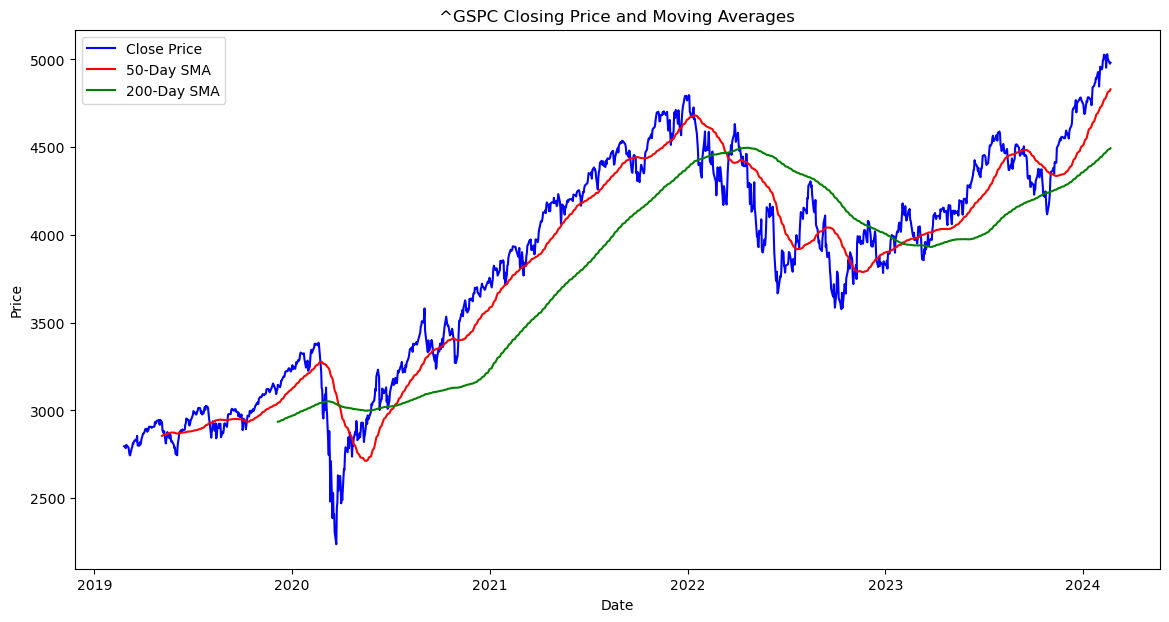

/Users/shivakasireddy/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/shivakasireddy/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/shivakasireddy/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/shivakasireddy/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1257
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -6581.510
Date:                Thu, 22 Feb 2024   AIC                          13169.021
Time:                        11:21:30   BIC                          13184.428
Sample:                             0   HQIC                         13174.812
                               - 1257                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4032      0.116     -3.481      0.000      -0.630      -0.176
ma.L1          0.2956      0.122      2.418      0.016       0.056       0.535
sigma2      2089.0678     48.843     42.771      0.0

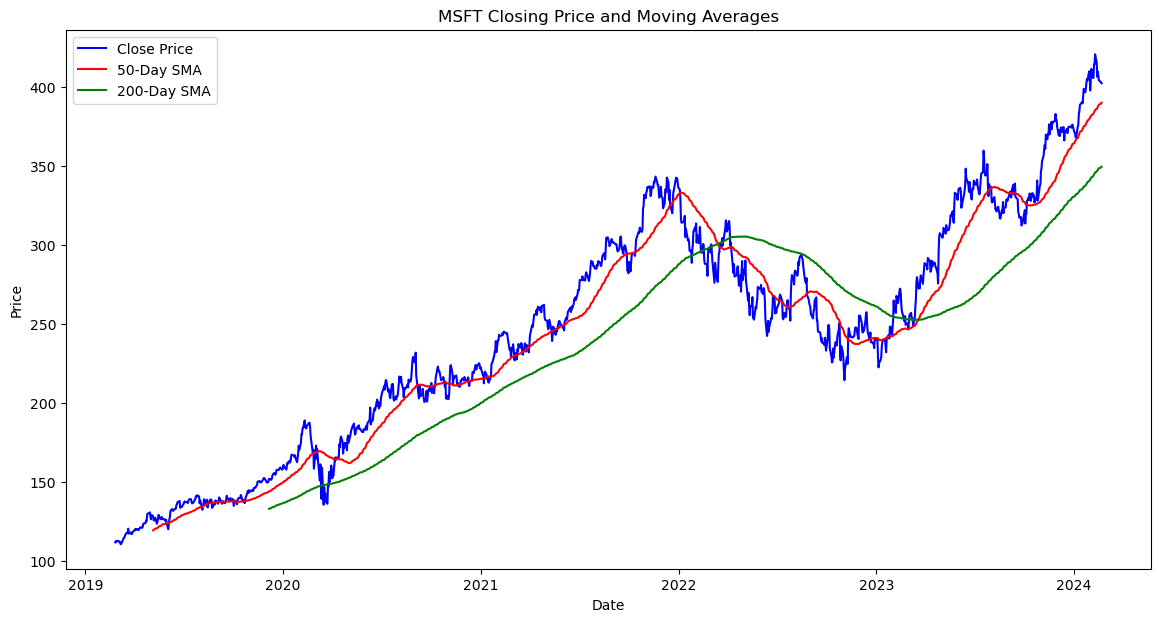

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1257
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3651.071
Date:                Thu, 22 Feb 2024   AIC                           7308.141
Time:                        11:21:30   BIC                           7323.548
Sample:                             0   HQIC                          7313.932
                               - 1257                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2249      0.186      1.209      0.227      -0.140       0.589
ma.L1         -0.3296      0.183     -1.797      0.072      -0.689       0.030
sigma2        19.6076      0.574     34.155      0.0

/Users/shivakasireddy/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/shivakasireddy/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/shivakasireddy/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/shivakasireddy/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an

In [4]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Function to download stock data and apply ARIMA model
def predict_with_arima_and_ma(ticker, start_date, end_date):
    # Download data
    data = yf.download(ticker, start=start_date, end=end_date)
    
    # Calculate Moving Averages
    data['SMA_50'] = data['Close'].rolling(window=50).mean()
    data['SMA_200'] = data['Close'].rolling(window=200).mean()
    
    # Plot closing price and moving averages
    plt.figure(figsize=(14, 7))
    plt.plot(data['Close'], label='Close Price', color='blue')
    plt.plot(data['SMA_50'], label='50-Day SMA', color='red')
    plt.plot(data['SMA_200'], label='200-Day SMA', color='green')
    plt.title(f'{ticker} Closing Price and Moving Averages')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()
    
    # Fit ARIMA model - assuming parameters (1,1,1) as a starting point
    # These parameters should be optimized based on the dataset
    model = ARIMA(data['Close'], order=(1, 1, 1))
    model_fit = model.fit()
    
    # Summary of the model
    print(model_fit.summary())
    
    # Forecast the next 5 days
    forecast = model_fit.forecast(steps=5)
    print(f"Forecast for the next 5 days: \n{forecast}")

# Set the start and end date for the past 5 years
end_date = pd.Timestamp.today().strftime('%Y-%m-%d')
start_date = (pd.Timestamp.today() - pd.Timedelta(days=5*365)).strftime('%Y-%m-%d')

# Predict for S&P 500
predict_with_arima_and_ma('^GSPC', start_date, end_date)

# Predict for Microsoft
predict_with_arima_and_ma('MSFT', start_date, end_date)
